<a href="https://colab.research.google.com/github/KashishPJadhav/FeatureEngg/blob/main/FeatureEngg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

# Create a sample dataset with 10 rows and 9 columns
# Using random numbers for demonstration purposes
num_rows = 10
num_cols = 9
data = np.random.randint(0, 10, size=(num_rows, num_cols))

# Create a pandas DataFrame
dataset = pd.DataFrame(data)

# Mark zero values as missing or NaN
dataset[[1, 2, 3, 4, 5]] = dataset[[1, 2, 3, 4, 5]].replace(0, np.NaN)

# Split dataset into inputs and outputs
values = dataset.values
X = values[:, 0:8]
y = values[:, 8]

# Check for NaN values
print(np.isnan(X).sum())
print(np.isnan(y).sum())

# Handle missing values by imputation
imputer = SimpleImputer(strategy='mean')  # Impute missing values with the mean of each column
X = imputer.fit_transform(X)
print(X)
# Evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Display the mean accuracy
print("Mean Accuracy: %.3f" % result.mean())

6
0
[[7.         1.         6.14285714 9.         9.         3.
  0.         9.        ]
 [7.         3.66666667 7.         5.         9.         9.
  8.         9.        ]
 [3.         2.         7.         4.         4.         3.
  2.         6.        ]
 [1.         3.         8.         9.         3.         4.
  5.         4.        ]
 [6.         6.         3.         2.         4.         2.
  3.         3.        ]
 [8.         1.         6.14285714 2.         4.         3.88888889
  8.         3.        ]
 [2.         4.         7.         1.         8.         7.
  5.         8.        ]
 [1.         4.         6.14285714 1.         1.         4.
  4.         5.        ]
 [4.         6.         6.         7.         5.66666667 2.
  9.         4.        ]
 [6.         6.         5.         7.         9.         1.
  0.         7.        ]]
Mean Accuracy: 0.000


In [ ]:
from pandas import read_csv
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
dataset = read_csv('diabetes.csv', header=None)
print(dataset)


               0        1              2              3        4     5  \
0    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
1              6      148             72             35        0  33.6   
2              1       85             66             29        0  26.6   
3              8      183             64              0        0  23.3   
4              1       89             66             23       94  28.1   
..           ...      ...            ...            ...      ...   ...   
764           10      101             76             48      180  32.9   
765            2      122             70             27        0  36.8   
766            5      121             72             23      112  26.2   
767            1      126             60              0        0  30.1   
768            1       93             70             31        0  30.4   

                            6    7        8  
0    DiabetesPedigreeFunction  Age  Outcome  
1                  

In [ ]:
from pandas import read_csv
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold, cross_val_score
from sklearn.impute import SimpleImputer

# Load dataset
dataset = read_csv('diabetes.csv', header=0)

# Mark zero values as missing or NaN
dataset = dataset.replace(0, np.NaN)

# Handling missing values using imputation (mean imputation in this case)
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Impute missing values
X = imputer.fit_transform(X)
X = X.astype(np.float64)

# Print any remaining NaN values (should be zero after imputation)
print(np.isnan(X).sum())
print(np.isnan(y).sum())
y = imputer.fit_transform(y.reshape(-1, 1)).ravel()
# Evaluate an LDA model on the dataset using k-fold cross-validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3, shuffle=True, random_state=None)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Display the mean accuracy of the model
print(result.mean())


0
500
1.0


In [ ]:
from pandas import read_csv
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# read data set from csv file
dataset = read_csv('diabetes.csv',header=0)
dataset.shape
print(dataset)
# mark zero values as missing or NaN
dataset = dataset.replace(0, numpy.NaN)
# drop rows with missing values
dataset.dropna(inplace=True)
dataset.shape
# split dataset into inputs and outputs
values = dataset.values
X = values[:,0:8]
y = values[:,8]
X = X.astype(np.float64)
print(np.isnan(X).sum())
print(np.isnan(y).sum())
# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3, random_state=None)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(" Accuracy of Model :")
print(result.mean())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
from pandas import read_csv
import numpy
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
dataset = read_csv('diabetes.csv', header=None)
display(dataset.shape)
display(dataset.head(5))

# mark zero values as missing or NaN
dataset[[0,1,2,3,4,5,6,7]] = dataset[[0,1,2,3,4,5,6,7]].replace(0, numpy.NaN)


dataset_without_null = read_csv('diabetes.csv', header=None)

# mark zero values as missing or NaN
dataset_without_null = dataset.replace(0, numpy.NaN)

# drop rows with missing values
dataset_without_null.dropna(inplace=True)
# split dataset into inputs and outputs
values = dataset.values
X = values[:,0:8]
y = values[:,8]
display(X)

(769, 9)

,0,1,2,3,4,5,6,7,8
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


array([['Pregnancies', 'Glucose', 'BloodPressure', ..., 'BMI',
        'DiabetesPedigreeFunction', 'Age'],
       ['6', '148', '72', ..., '33.6', '0.627', '50'],
       ['1', '85', '66', ..., '26.6', '0.351', '31'],
       ...,
       ['5', '121', '72', ..., '26.2', '0.245', '30'],
       ['1', '126', '60', ..., '30.1', '0.349', '47'],
       ['1', '93', '70', ..., '30.4', '0.315', '23']], dtype=object)

In [ ]:
import pandas as pd
import numpy
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
dataset = pd.read_csv('diabetes.csv', header=0)
print(dataset.shape)
print(dataset.head(5))

# mark zero values as missing or NaN
dataset= dataset.replace(0, numpy.NaN)


dataset_without_null =pd.read_csv('diabetes.csv', header=None)

# mark zero values as missing or NaN
dataset_without_null = dataset.replace(0, numpy.NaN)

# drop rows with missing values
dataset_without_null.dropna(inplace=True)
print(dataset_without_null)
values = dataset_without_null.values
X = values[:,0:8]
y = values[:,8]
print(X)
dataset_without_null.iloc[:,0:8]=X
print("Datset after dropping rows with null values")
print(dataset_without_null.head())

imputer = SimpleImputer(strategy="mean")
transformed_X_mean = imputer.fit_transform(X)
print("\nDataset After Imputation with Mean:")
dataset_with_mean = dataset.copy()
dataset_with_mean.iloc[:, 0:8] = imputer.transform(dataset.iloc[:, 0:8])
print(dataset_with_mean.head())

# Impute missing values with median column values
imputer = SimpleImputer(strategy="median")
transformed_X_median = imputer.fit_transform(X)
print("\nDataset After Imputation with Median:")
dataset_with_median = dataset.copy()
dataset_with_median.iloc[:, 0:8] = imputer.transform(dataset.iloc[:, 0:8])
print(dataset_with_median.head())

# Impute missing values with most frequent value
imputer = SimpleImputer(strategy="most_frequent")
transformed_X_most_frequent = imputer.fit_transform(X)
print("\nDataset After Imputation with Most Frequent Value:")
dataset_with_most_frequent = dataset.copy()
dataset_with_most_frequent.iloc[:, 0:8] = imputer.transform(dataset.iloc[:, 0:8])
print(dataset_with_most_frequent.head())

# Impute missing values with a constant value (0)
imputer = SimpleImputer(strategy="constant", fill_value=0)
transformed_X_constant_0 = imputer.fit_transform(X)
print("\nDataset After Imputation with Constant Value (0):")
dataset_with_constant_0 = dataset.copy()
dataset_with_constant_0.iloc[:, 0:8] = imputer.transform(dataset.iloc[:, 0:8])
print(dataset_with_constant_0.head())

# Impute missing values with a constant value (1)
imputer = SimpleImputer(strategy="constant", fill_value=1)
transformed_X_constant_1 = imputer.fit_transform(X)
print("\nDataset After Imputation with Constant Value (1):")
dataset_with_constant_1 = dataset.copy()
dataset_with_constant_1.iloc[:, 0:8] = imputer.transform(dataset.iloc[:, 0:8])
print(dataset_with_constant_1.head())

model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3, shuffle=False,random_state=None)

# evaluate for mean replacement strategy
result = cross_val_score(model, transformed_X_mean, y, cv=kfold, scoring='accuracy')
print(" Accuracy for mean replacement  strategy          :- " + str(result.mean()))

# evaluate for median replacement strategy
result = cross_val_score(model, transformed_X_median, y, cv=kfold, scoring='accuracy')
print(" Accuracy for median replacement  strategy        :- " + str(result.mean()))

# evaluate for most_frequent replacement strategy
result = cross_val_score(model, transformed_X_most_frequent, y, cv=kfold, scoring='accuracy')
print(" Accuracy for most_frequent replacement  strategy :- " + str(result.mean()))

# evaluate for constant=0 replacement strategy
result = cross_val_score(model, transformed_X_constant_0, y, cv=kfold, scoring='accuracy')
print(" Accuracy for constant=0 replacement  strategy    :- " + str(result.mean()))

# evaluate for constant - 0 replacement strategy
result = cross_val_score(model, transformed_X_constant_1, y, cv=kfold, scoring='accuracy')
print(" Accuracy for constant=1 replacement  strategy    :- " + str(result.mean()))


(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
6            3.0     78.0           50.0           32.0     88.0  31.0   
8            2.0    197.0           70.0           45.0    543.0  30.5   
13           1.0    189.0           60.0           23.0    846.0  30.1  

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
df=pd.read_csv('iris.csv')
print("Whole data : ")
print(df)
if df.shape[1] > 4:
    df_with_nan = df[df.iloc[:, 4].isnull()]
else:
    print("The dataset does not contain 5 columns as expected.")
print("Data with NaN values : ")
print(df_with_nan)
df_no_nan=df.dropna()
print("Data without NaN values : ")
print(df_no_nan)
x=df_no_nan.iloc[:,:-1].values
y=df_no_nan.iloc[:,-1].values
clf=KNeighborsClassifier(5,weights='distance')
model=clf.fit(x, y)
imputedVal=model.predict(df_with_nan.iloc[:,:-1].values)
imputedVal.reshape(-1,1)
print("Imputed Values : ")
print(imputedVal)
df_nan_imputed=np.hstack((df_with_nan.iloc[:,:-1].values,imputedVal.reshape(-1,1)))
print("\nImputed values hstack with dataset with Nan")
print(df_nan_imputed)
finalDf=pd.concat([pd.DataFrame(df_nan_imputed),df_no_nan])
print("\n Final Dataset : ")
print(finalDf)
pd.DataFrame(finalDf).to_csv("iris_processed.csv",header=False,index=False)


Whole data : 
     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2             NaN
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4             NaN
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0             NaN
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]
Data with NaN values : 
     5.1  3.5  1.4  0.2 Iris-setosa
1    4.7  3.2  1.3  0.2         NaN
4    5.4  3.9  1.7  0.4         NaN
6    5.0  3.4  1.5  0.2         NaN
7    4.4  2.9  1.4  0.2         NaN
8    4.9  3.1  1.5  0.1         NaN
9    5.4  3.7  1.5  0.2         NaN
56   4.9  2.4  3.3  1.0         NaN
57   6.6  2.9  4.6  1.3         NaN
61   6.0  2.2  4.0  1.0         NaN
63   5.6  2.9  3.6  1.3         NaN
142  6.8  3.2  5.9  2.3         NaN
143  6.7  3.3  5.7  2.5   

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

df=pd.read_csv('diabetes2.csv',header=None);
df.describe()



,0,1,2,3,4,5,6,7,8
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,4.204161,120.858257,69.106632,20.550065,79.695709,31.990507,0.471672,33.227568,0.348505
std,8.421740,31.967626,19.343229,15.946293,115.204894,7.879235,0.331161,11.758373,0.476807
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.000000,36.600000,0.626000,41.000000,1.000000
max,200.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([599., 164.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.        ,   6.66666667,  13.33333333,  20.        ,
         26.66666667,  33.33333333,  40.        ,  46.66666667,
         53.33333333,  60.        ,  66.66666667,  73.33333333,
         80.        ,  86.66666667,  93.33333333, 100.        ,
        106.66666667, 113.33333333, 120.        , 126.66666667,
        133.33333333, 140.        , 146.66666667, 153.33333333,
        160.        , 166.66666667, 173.33333333, 180.        ,
        186.66666667, 193.33333333, 200.        ]),
 <BarContainer object of 30 artists>)

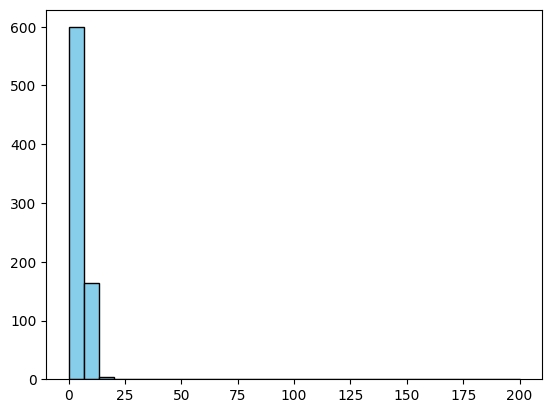

In [ ]:
x=df.iloc[:,0:1].values
plt.hist(x,density=False,bins=30,color='skyblue', edgecolor='black')

In [ ]:
def outlier_zscore(ys):
    thresh=3

    mean=np.mean(ys)
    stde=np.std(ys)
    z_scores=[(y-mean)/stde for y in ys]
    return np.where(np.abs(z_scores)>thresh)

y1=outlier_zscore(x)
print("outliers using def : ")
print(y1)

zs=zscore(x)
print("Z score od x : ")
print(zs)

y2=np.where(np.abs(zs)>3)
print("Outliers usind directly 'zscore' : ")
print(y2)

def outlier_iqr(ys):
    q1,q2,q3=np.percentile(ys,[25,50,75])
    iqr=q3-q1
    lower_bound=q1-(iqr*1.5)
    upper_bound=q3+(iqr*1.5)
    outl_indices=np.where((ys>upper_bound) | (ys<lower_bound))
    return q1,q2,q3,outl_indices

y3=outlier_iqr(x)
print("Outliers using 3 quartiles : ")
print(y3)

arr = [4,7,8,9,10,12,12,14,15,18,20,75]
quartile_1,quartile_2, quartile_3 = np.percentile(arr, [25,50,75])
print(quartile_1,quartile_2,quartile_3)
y2 = outlier_iqr(arr)
print(y2)

outliers using def : 
(array([ 34, 768]), array([0, 0]))
Z score od x : 
[[ 0.21337722]
 [-0.38071069]
 [ 0.45101238]
 [-0.38071069]
 [-0.49952827]
 [ 0.09455964]
 [-0.14307553]
 [ 0.68864754]
 [-0.26189311]
 [ 0.45101238]
 [-0.02425795]
 [ 0.68864754]
 [ 0.68864754]
 [-0.38071069]
 [ 0.09455964]
 [ 0.3321948 ]
 [-0.49952827]
 [ 0.3321948 ]
 [-0.38071069]
 [-0.38071069]
 [-0.14307553]
 [ 0.45101238]
 [ 0.3321948 ]
 [ 0.56982996]
 [ 0.80746512]
 [ 0.68864754]
 [ 0.3321948 ]
 [-0.38071069]
 [ 1.04510029]
 [ 0.09455964]
 [ 0.09455964]
 [-0.14307553]
 [-0.14307553]
 [ 0.21337722]
 [23.26398803]
 [-0.02425795]
 [ 0.80746512]
 [ 0.56982996]
 [-0.26189311]
 [-0.02425795]
 [-0.14307553]
 [ 0.3321948 ]
 [ 0.3321948 ]
 [ 0.56982996]
 [ 0.3321948 ]
 [-0.49952827]
 [-0.38071069]
 [-0.26189311]
 [ 0.3321948 ]
 [ 0.3321948 ]
 [-0.38071069]
 [-0.38071069]
 [ 0.09455964]
 [ 0.45101238]
 [ 0.3321948 ]
 [-0.38071069]
 [ 0.3321948 ]
 [-0.49952827]
 [-0.49952827]
 [-0.49952827]
 [-0.26189311]
 [ 0.4510123

In [ ]:
import pandas as pd
import numpy as np

#Create a DataFrame
d ={
    'Name':['Alisa','Bobby','jodha','jack','raghu','Cathrine',
            'Alisa','Bobby','kumar','Alisa','Alex','Cathrine'],
    'Age':[26,24,23,22,23,24,26,24,22,23,24,24],

    'Score':[85,63,55,74,31,77,85,63,42,62,89,77]}
df=pd.DataFrame(d)
print("Original Data Frame : ")
print(df)

dupe=df.duplicated()
print("\nIs Duplicated : ")
print(dupe)

df1=df.drop_duplicates()
print("\nDropping Duplicates : ")
print(df1)

df_keeplast=df.drop_duplicates(keep='last')
print("\nDropping Duplicates keeping last : ")
print(df_keeplast)

df_keepfirst=df.drop_duplicates(keep='first')
print("\nDropping Duplicates keeping first : ")
print(df_keepfirst)

df_column=df.drop_duplicates(['Name'],keep='last')
print("\nDropping Duplicates by column name 'Name' keeping last : ")
print(df_column)


Original Data Frame : 
        Name  Age  Score
0      Alisa   26     85
1      Bobby   24     63
2      jodha   23     55
3       jack   22     74
4      raghu   23     31
5   Cathrine   24     77
6      Alisa   26     85
7      Bobby   24     63
8      kumar   22     42
9      Alisa   23     62
10      Alex   24     89
11  Cathrine   24     77

Is Duplicated : 
0     False
1     False
2     False
3     False
4     False
5     False
6      True
7      True
8     False
9     False
10    False
11     True
dtype: bool

Dropping Duplicates : 
        Name  Age  Score
0      Alisa   26     85
1      Bobby   24     63
2      jodha   23     55
3       jack   22     74
4      raghu   23     31
5   Cathrine   24     77
8      kumar   22     42
9      Alisa   23     62
10      Alex   24     89

Dropping Duplicates keeping last : 
        Name  Age  Score
2      jodha   23     55
3       jack   22     74
4      raghu   23     31
6      Alisa   26     85
7      Bobby   24     63
8      kumar   22

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


    Product Category_Clothing  Product Category_Electronics  \
0                         0.0                           1.0   
1                         0.0                           0.0   
2                         1.0                           0.0   
3                         0.0                           1.0   
4                         1.0                           0.0   
5                         0.0                           0.0   
6                         0.0                           0.0   
7                         1.0                           0.0   
8                         0.0                           1.0   
9                         0.0                           0.0   
10                        0.0                           0.0   
11                        1.0                           0.0   
12                        0.0                           0.0   
13                        0.0                           1.0   
14                        0.0                          

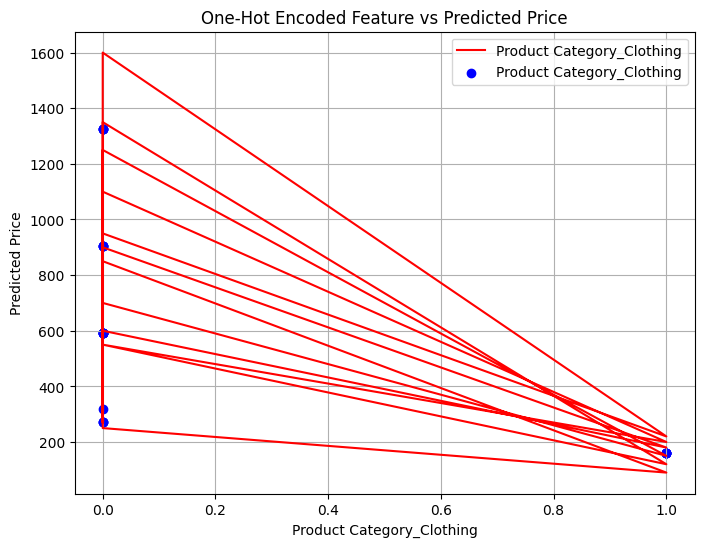

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
df=pd.read_csv('1_Cat_num_target.csv')
x=df[['Product Category']]
y=df['Price']
enc=OneHotEncoder(sparse=False)
x_en=enc.fit_transform(x)
en_c=enc.get_feature_names_out(['Product Category'])
x_en_df=pd.DataFrame(x_en,columns=en_c)
en_df=pd.concat([x_en_df,df[['Price']]],axis=1)
print(en_df)
m=LinearRegression()
m.fit(x_en,y)
yp=m.predict(x_en)
plt.figure(figsize=(8, 6))
plt.plot(x_en[:, 0], y, color='red', label=en_c[0])
plt.scatter(x_en[:, 0], yp, color='blue', label=en_c[0])
plt.xlabel(en_c[0])
plt.ylabel('Predicted Price')
plt.title('One-Hot Encoded Feature vs Predicted Price')
plt.legend()
plt.grid(True)
plt.show()